In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/comments.csv')

Mounted at /content/gdrive


In [3]:
data

,Unnamed: 0,comment
0,0,jobs that start with senior and require signif...
1,1,Work for a cybersecurity vendor
2,2,Architecture for F500. Balance is good. I don'...
3,3,Defense Contractor. Anything with a clearance ...
4,4,Check out Healthcare Cybersecurity jobs. Many ...
...,...,...
1027,1027,You have to know what the tools are doing and ...
1028,1028,The tools are meant to do the grunt work of se...
1029,1029,Every job I can think of that requires a degre...
1030,1030,I feel cyber Security is a mix of both network...


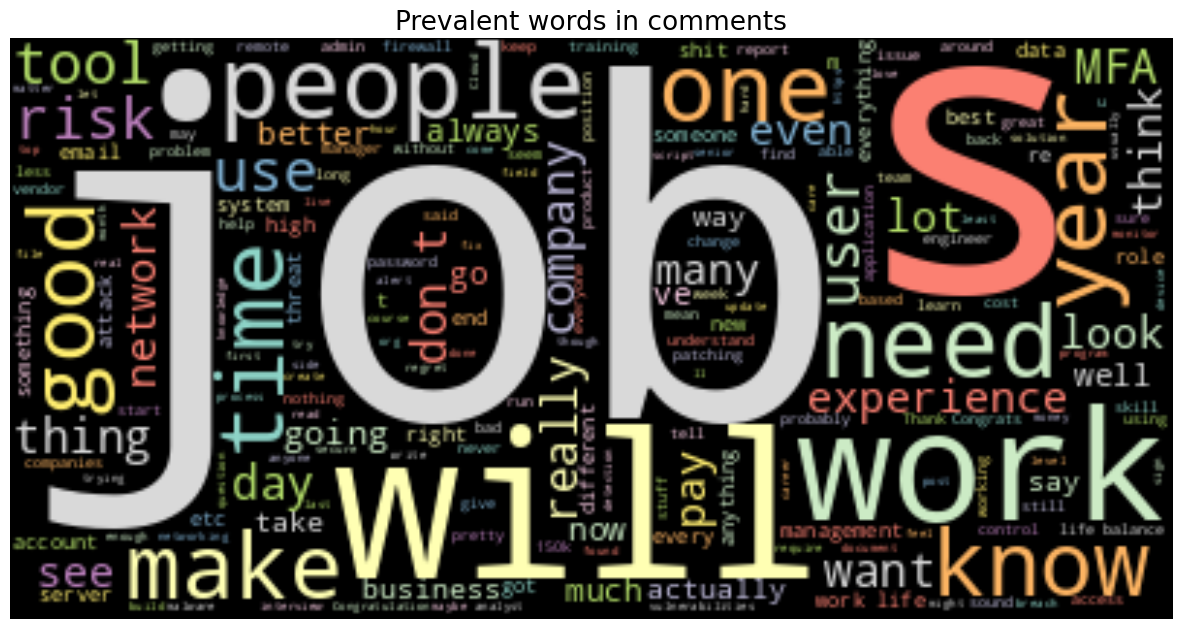

In [4]:
text = "".join(i for i in data.comment if 'cyber' not in i and 'security' not in i )
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in comments',fontsize=19)
plt.show()

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s]','',text)
    
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
    
    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

data['comment'] = data['comment'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
data.head()

,Unnamed: 0,comment
0,0,job start senior requir signific experi
1,1,work cybersecur vendor
2,2,architectur balanc good dont work week
3,3,defens contractor anyth clearanc youll near ha...
4,4,check healthcar cybersecur job mani health sys...


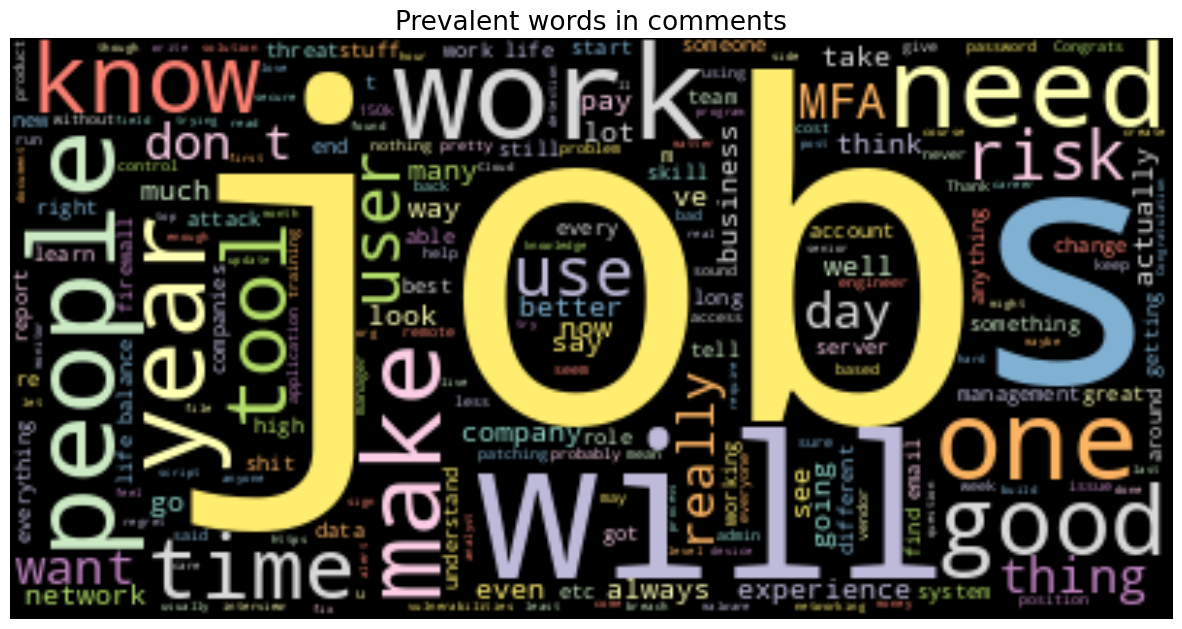

In [7]:
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in comments',fontsize=19)
plt.show()

In [9]:
def SentimentChecker (newTweets):
    newDF = pd.DataFrame(columns=['text','subjectivity','polarity', 'sentiment'])
    for i in newTweets: 
        blob = TextBlob(i) #Create Textblob object of reddit comments
        polarity = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity
        
        if polarity > 0 : #If polarity of tweets is positive then sent = positive
            sentiment = "positive"
        elif polarity < 0: #If polarity of tweet is negative then sent = negative
            sentiment = "negative"
        else: #If polarity equals 0 then sent = neutral
            sentiment = "neutral"
        
        #Create row for dataframe
        row = [i, sub, polarity, sentiment] 
        #Add row to dataframe
        newDF.loc[len(newDF)] = row 
    return newDF

In [10]:
def JointPlotter(newDF):
    #Create jointplot for polarity and subjectivity of reddit comments.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()
    
    sentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    sentimentCounts = sentimentCounts.rename({'sentiment': 'count'}, axis=1)
    sentimentCounts["sentiment"] = sentimentCounts.index
    
    sns.barplot(data= sentimentCounts, x="sentiment", y = "count") 
    
    plt.show()

In [11]:
def visualiser(subset):
    #Create frequency distribution
    fdist = nltk.FreqDist()
    for i in subset["text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j] +=1
    fdist.plot(30, cumulative=False)
    
    #Create word cloud 
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

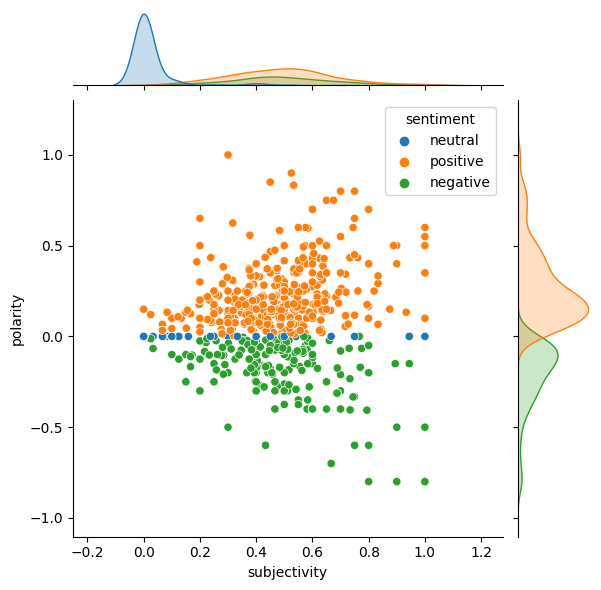

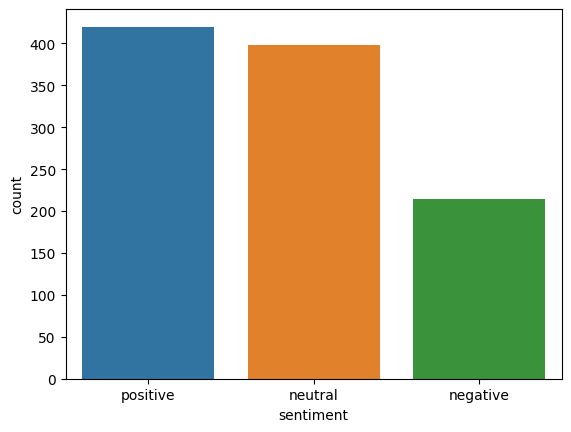

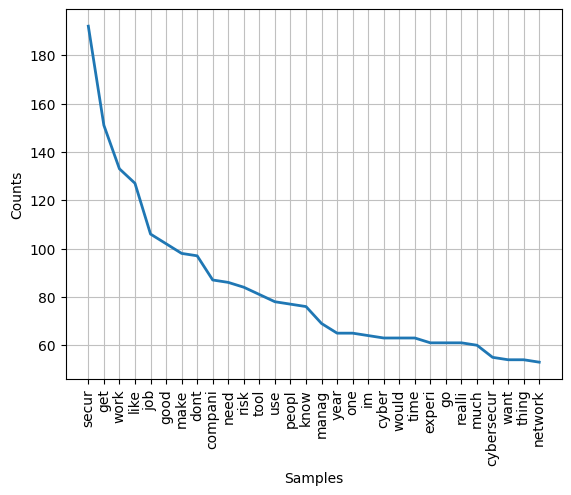

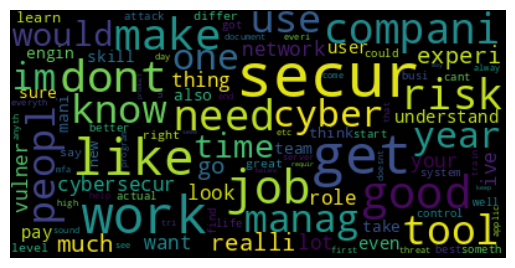

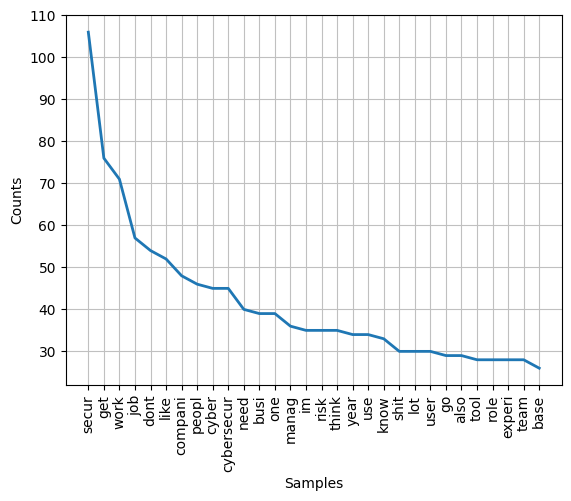

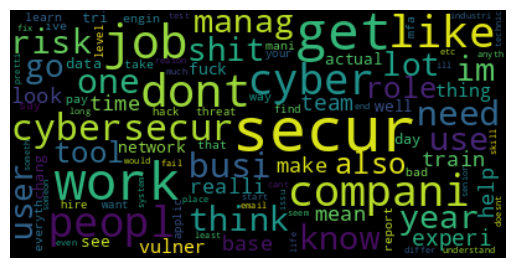

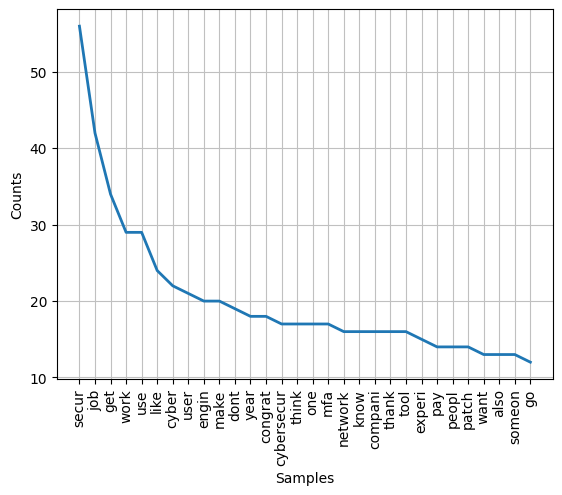

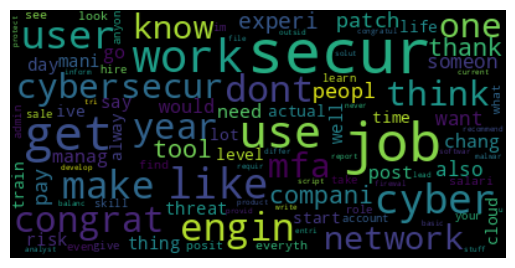

In [12]:
cleanTweets=data['comment']
SentimentDF = SentimentChecker(cleanTweets)
JointPlotter(SentimentDF)
    
#Call visualiser function to plot a wordcloud and a frequency distribution
visualiser(SentimentDF[SentimentDF["sentiment"] == "positive"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "negative"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "neutral"])